In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import numpy as np
import collections
import random
# Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
col_names = ["classification",
             "age" ,
             "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]
feature_names = [ "age" ,
              "menopause" ,
             "tumor-size",
             "inv-nodes",
             "node-caps" ,
             "deg-malig" ,
             "breast" ,
             "breast-quad" ,
             "irradiat"]

In [3]:
ds = pd.read_csv("Datasets/breast-cancer.data", header=None, names=col_names)

In [4]:
ds.head()

,classification,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
ds["deg-malig"] = ds["deg-malig"].astype('category')

In [6]:
set(ds["menopause"].values)

{'ge40', 'lt40', 'premeno'}

In [7]:
one_hot_feature_names = pd.get_dummies(ds[feature_names]).columns.values
one_hot_feature_names

array(['age_20-29', 'age_30-39', 'age_40-49', 'age_50-59', 'age_60-69',
       'age_70-79', 'menopause_ge40', 'menopause_lt40',
       'menopause_premeno', 'tumor-size_0-4', 'tumor-size_10-14',
       'tumor-size_15-19', 'tumor-size_20-24', 'tumor-size_25-29',
       'tumor-size_30-34', 'tumor-size_35-39', 'tumor-size_40-44',
       'tumor-size_45-49', 'tumor-size_5-9', 'tumor-size_50-54',
       'inv-nodes_0-2', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8',
       'inv-nodes_9-11', 'node-caps_?', 'node-caps_no', 'node-caps_yes',
       'deg-malig_1', 'deg-malig_2', 'deg-malig_3', 'breast_left',
       'breast_right', 'breast-quad_?', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up',
       'breast-quad_right_low', 'breast-quad_right_up', 'irradiat_no',
       'irradiat_yes'], dtype=object)

In [8]:
enc = preprocessing.OneHotEncoder()
enc.fit(ds[feature_names])
FEATURES = enc.transform(ds[feature_names]).toarray()

In [16]:
FEATURES
len(FEATURES[0])

43

In [17]:
le = preprocessing.LabelEncoder().fit(ds["classification"])

In [18]:
LABELS = le.transform(ds["classification"])

In [19]:
LABELS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
def print_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = one_hot_feature_names, class_names=["no-recurrence-events", "RECURRENCE-EVENTS"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('dt.png')
    Image(graph.create_png())

In [21]:
def bagging_indexes(sup, max_cardinality):
    r = np.array([])
    for i in range(0, sup):    
        if len(r) == max_cardinality:
            break
        else:    
            r = np.append(r, random.sample(range(0,sup), 1))
            r = [int(v) for v in np.unique(r)]
    return r

In [22]:
def feature_train(features, labels, indexes):
    new_features = [ a[indexes] for a in features  ]
    dt = DecisionTreeClassifier(criterion="gini")
    dt.fit(new_features, labels)
    return dt

In [23]:
def feature_predict(dt, feature, indexes):
     return dt.predict([ feature[indexes] ])[0]

In [24]:
indexes = bagging_indexes(len(FEATURES[0]), 10)
indexes

[1, 3, 9, 16, 19, 29, 31, 32, 33, 40]

In [42]:
dt = feature_train(FEATURES, LABELS, indexes)

In [71]:
for i in range(0, len(FEATURES)): 
       if  feature_predict(dt, FEATURES[i], indexes) == 1:
            print(i)
            break

145


In [43]:
def print_tree_indexed(dt, indexes):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = one_hot_feature_names[indexes], class_names=["no-recurrence-events", "RECURRENCE-EVENTS"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('dt.png')
    Image(graph.create_png())

In [72]:
print_tree_indexed(dt, indexes)

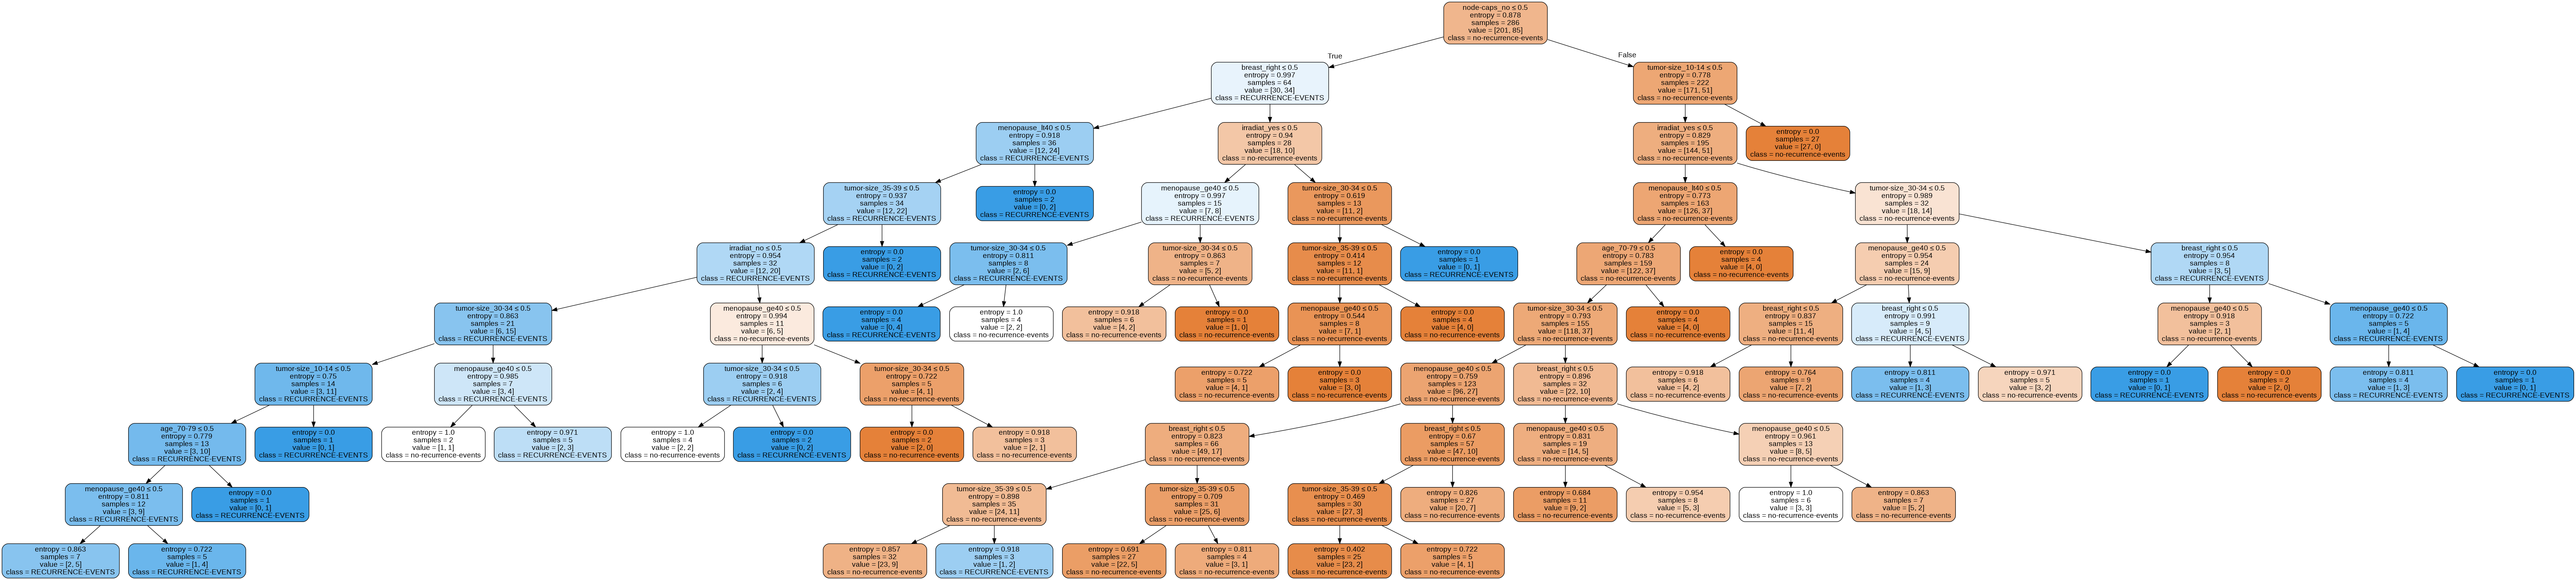

In [73]:
Image("dt.png")

In [52]:
def build_train_test(labels, pruning_ratio):
    total_samples = len(labels)
    frequencies =  collections.Counter(labels)
    prune_indexes_for_class = {k: random.sample(range(0,v), int(v*pruning_ratio)) for k, v in frequencies.items()}
    frequencies_counter = {k: 0 for k, v in frequencies.items()}
    training = np.array([])
    pruning = np.array([])
    for i in range(0, total_samples):
        if frequencies_counter[labels[i]] in prune_indexes_for_class[labels[i]]:
            pruning = np.append(pruning, np.array([i]))
        else:
            training = np.append(training, np.array([i]))
        frequencies_counter[labels[i]] += 1
    return[[int(v) for v in training], [int(v) for v in pruning]]   

In [167]:
training, test = build_train_test(LABELS, 0.2)

In [168]:
len(training)

229

In [188]:
num_features = len(FEATURES[0])
ensemble_size = 10
ensemble_max_cardinality = num_features
ensemble = []
for i in range(0, ensemble_size):
    indexes = bagging_indexes(num_features, ensemble_max_cardinality)
    bag_indexes = bagging_indexes( len(training), len(training))
    bag_train = []
    bag_test = []
    for i in range(0, len(training)):
        if i in bag_indexes:
            bag_train.append(training[i])
        else:    
            bag_test.append(training[i])   
    dt = feature_train(FEATURES[bag_train], LABELS[bag_train], indexes)
    true_values = np.array(LABELS[bag_test])
    predicted_values = []
    for j in bag_test:
        predicted_values.append(feature_predict(dt, FEATURES[j], indexes))
    predicted_values = np.array(predicted_values)    
    ensemble.append( [dt, indexes, confusion_matrix(true_values, predicted_values,normalize='true') ] )

In [189]:
def predict_ensemble(ensemble, feature):
    result = []
    for i in range(0, len(ensemble)):
        col = feature_predict(ensemble[i][0], feature, ensemble[i][1])
        result.append(np.array([ row[col] for  row in ensemble[i][2]  ]))
    return np.argmax(sum(result))  

In [190]:
test_predictions= []
for i in range(0, len(test)):
    test_predictions.append(predict_ensemble(ensemble, FEATURES[test[i]]))

In [191]:
confusion_matrix(LABELS[test],test_predictions, normalize='true')

array([[0.8       , 0.2       ],
       [0.70588235, 0.29411765]])

In [192]:
ensemble

[[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  [0,
   1,
   2,
   3,
   4,
   5,
   7,
   8,
   12,
   15,
   20,
   22,
   23,
   24,
   25,
   26,
   28,
   29,
   32,
   33,
   34,
   37,
   39,
   40,
   42],
  array([[0.72307692, 0.27692308],
         [0.5       , 0.5       ]])],
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                  